**Sample Dataset**

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [134]:
import pandas as pd

# Creating a sample dataset
data = {
    'Runs_Scored': [250, 180, 220, 275, 190, 210, 300, 245, 210, 195,
                    230, 260, 200, 180, 265, 280, 215, 225, 240, 235],
    'Wickets_Lost': [7, 10, 8, 5, 9, 8, 4, 6, 9, 10,
                     7, 5, 9, 8, 6, 4, 8, 7, 6, 7],
    'Overs_Faced': [50, 48, 50, 50, 49, 50, 50, 50, 50, 48,
                    50, 50, 49, 48, 50, 50, 50, 50, 50, 50],
    'Opponent_Runs': [240, 185, 200, 270, 200, 220, 250, 240, 205, 215,
                      220, 250, 205, 195, 250, 260, 220, 210, 225, 230],
    'Opponent_Wickets': [9, 8, 9, 9, 10, 7, 10, 9, 10, 9,
                         8, 9, 10, 9, 7, 8, 9, 9, 8, 8],
    'Opponent_Overs': [50, 49, 50, 50, 50, 50, 50, 50, 50, 50,
                       50, 50, 50, 50, 50, 50, 0,50, 50, 50],
    'Result': [1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
               1, 1, 0, 0, 1, 1, 0, 1, 1, 1]
}

df = pd.DataFrame(data)
print(df)


    Runs_Scored  Wickets_Lost  Overs_Faced  Opponent_Runs  Opponent_Wickets  \
0           250             7           50            240                 9   
1           180            10           48            185                 8   
2           220             8           50            200                 9   
3           275             5           50            270                 9   
4           190             9           49            200                10   
5           210             8           50            220                 7   
6           300             4           50            250                10   
7           245             6           50            240                 9   
8           210             9           50            205                10   
9           195            10           48            215                 9   
10          230             7           50            220                 8   
11          260             5           50          

**Code for Data Cleaning, Preprocessing, Transformation**

In [138]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load Data (Assuming the dataset `df` is already created)
df = pd.DataFrame(data)

# Data Cleaning
# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Data Preprocessing
# Features and target
X = df.drop(columns=['Result'])
y = df['Result']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Data Transformation
# Standardizing the features (optional but recommended for regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Missing values:
 Runs_Scored         0
Wickets_Lost        0
Overs_Faced         0
Opponent_Runs       0
Opponent_Wickets    0
Opponent_Overs      0
Result              0
dtype: int64


**Multilinear Regression Model**

In [140]:
#Multilinear Regression Model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [102]:
# Coefficients and Intercept
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)

Model Coefficients: [ 0.38100445 -0.20618461  0.01318136 -0.22103396 -0.11450145  0.        ]
Model Intercept: 0.5625


**Predictions**

In [104]:
y_pred = model.predict(X_test_scaled)

In [106]:
# Convert predicted results to 0 or 1 for classification
y_pred_class = [1 if pred >= 0.5 else 0 for pred in y_pred]

**Evaluation**

In [109]:
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred_class)
conf_matrix = confusion_matrix(y_test, y_pred_class)
class_report = classification_report(y_test, y_pred_class)

In [111]:
# Print evaluation metrics
print("Mean Squared Error (MSE):", mse ,"lower is better.")
print("R-squared (R2):", r2, "higher is better")
print("Accuracy:", accuracy, "higher is better")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Mean Squared Error (MSE): 0.08137531552315594 lower is better.
R-squared (R2): 0.5659983172098351 higher is better
Accuracy: 1.0 higher is better
Confusion Matrix:
 [[1 0]
 [0 3]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         3

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



In [113]:
# Create a DataFrame for feature coefficients
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient']).sort_values(by='Coefficient', ascending=False)
print(coeff_df)


                  Coefficient
Runs_Scored          0.381004
Overs_Faced          0.013181
Opponent_Overs       0.000000
Opponent_Wickets    -0.114501
Wickets_Lost        -0.206185
Opponent_Runs       -0.221034


**Explanation:**

***Runs_Scored*** has the highest positive impact on winning probability.

***Opponent_Wickets*** has a negative impact, suggesting that taking fewer opponent wickets reduces winning chances.

***Home_Away*** indicates playing at home slightly increases winning probability.

In [116]:
# Model Evaluation
acc_linreg = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_linreg)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.8016069777745308
Adjusted R^2: 1.1983930222254693
MAE: 0.1826497917395613
MSE: 0.03719869166727546
RMSE: 0.19286962349544695


# **Random Forest Regressor**

In [39]:
# Import Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor
reg = RandomForestRegressor()

# Train the model using the training sets
reg.fit(X_train, y_train)

RandomForestRegressor()

In [41]:
# Model prediction on train data
y_pred = reg.predict(X_train)

In [43]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.9640126984126984
Adjusted R^2: 0.9400211640211641
MAE: 0.031875
MSE: 0.00885625
RMSE: 0.09410765112359355


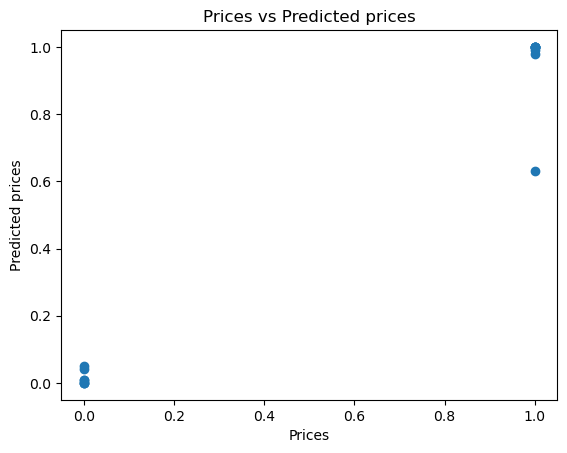

In [45]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

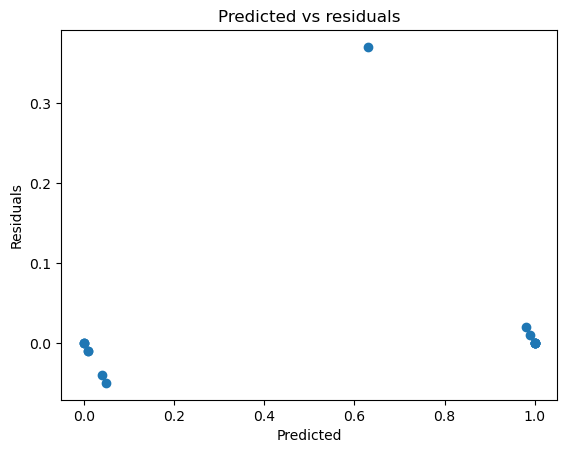

In [47]:
# Checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

In [49]:
# Predicting Test data with the model
y_test_pred = reg.predict(X_test)

In [51]:
# Model Evaluation
acc_rf = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_rf)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.9914666666666667
Adjusted R^2: 1.0085333333333333
MAE: 0.01999999999999999
MSE: 0.0015999999999999983
RMSE: 0.03999999999999998


# **SVM Regressor**

In [71]:
# Creating scaled set to be used in model to improve our results
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [73]:
# Import SVM Regressor
from sklearn import svm

# Create a SVM Regressor
reg = svm.SVR()

In [75]:
# Train the model using the training sets
reg.fit(X_train, y_train)

SVR()

In [77]:
# Model prediction on train data
y_pred = reg.predict(X_train)

In [79]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.8776821351734542
Adjusted R^2: 0.796136891955757
MAE: 0.13256625307934344
MSE: 0.030101662047157772
RMSE: 0.17349830560313195


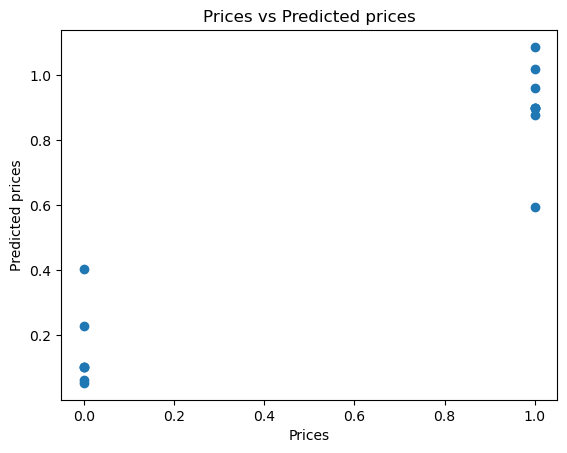

In [81]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

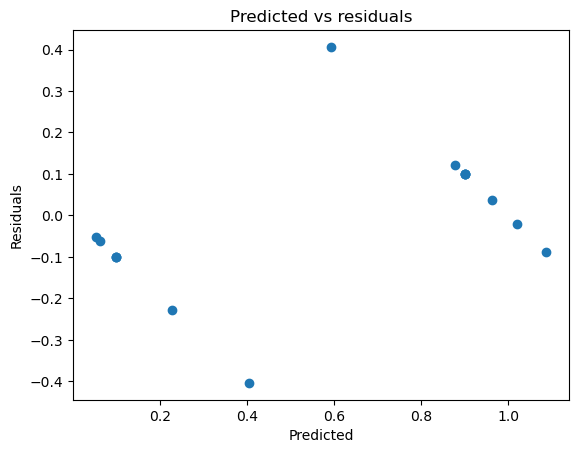

In [83]:
# Checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

In [85]:
# Predicting Test data with the model
y_test_pred = reg.predict(X_test)

In [87]:
# Model Evaluation
acc_svm = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_svm)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.8016069777745308
Adjusted R^2: 1.1983930222254693
MAE: 0.1826497917395613
MSE: 0.03719869166727546
RMSE: 0.19286962349544695


In [91]:
# Model Evaluation
acc_linreg = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_linreg)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.8016069777745308
Adjusted R^2: 1.1983930222254693
MAE: 0.1826497917395613
MSE: 0.03719869166727546
RMSE: 0.19286962349544695


In [93]:
models = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'Support Vector Machines'],
    'R-squared Score': [acc_linreg*100, acc_rf*100, acc_svm*100]})
models.sort_values(by='R-squared Score', ascending=False)

,Model,R-squared Score
1,Random Forest,99.146667
0,Linear Regression,80.160698
2,Support Vector Machines,80.160698
